In [6]:
# modules
import warnings
from pandasgui import show

# Custom classes
from DFInfo import DataFrameInfo
from Connector import RDSDatabaseConnector
from GraphPlotter import Plotter
from DFTransform import DataFrameTransform
from DTransform import DataTransform

if __name__ == "__main__":
    # to stop spam of deprecated feature
    warnings.simplefilter(action="ignore", category=FutureWarning) 
    #connects to online server, downloads the database, and stores in a file called loan_payments.csv
    #creates all the classes
    rdsdbc = RDSDatabaseConnector()
    dtransformer = DataTransform()
    dtinfo = DataFrameInfo()
    dftransformer = DataFrameTransform()
    plotter = Plotter()
    
    dataframe = rdsdbc.download_df()
    available_list = ["policy_code"]
    string_list = ["policy_code", "term"]
    strip_list = ["term"]
    qualitative_list = ["purpose", "grade", "sub_grade","home_ownership", "verification_status", "loan_status", "payment_plan", "application_type", "employment_length"]
    

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [3]:
#calls the main function in each data analysis class
dtransformer.set_available_list(available_list)
dtransformer.set_string_list(string_list)
dtransformer.set_strip_list(strip_list)
dtransformer.set_qualitative_list(qualitative_list)

dataframe = dtransformer.call_all_cleaners(dataframe)
####dataframe = dtinfo.call_all_information(dataframe)

In [ ]:
#calls the plotter and visualises the null value removal
nulls_before = dftransformer.count_nulls(dataframe)
dataframe = dftransformer.drop_columns(dataframe)
dataframe = dftransformer.impute_columns(dataframe)
nulls_after = dftransformer.count_nulls(dataframe)

plotter.plot_nulls_before_after(nulls_before, nulls_after)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Done Transformations
Setting up plots


PandasGUI WARNING — pandasgui.utility — In skewed_dataframe, converted column names to string: 0
PandasGUI INFO — pandasgui.gui — Opening PandasGUI
PandasGUI WARNING — pandasgui.utility — In unskewed_dataframe, converted column names to string: 0


Showing plots


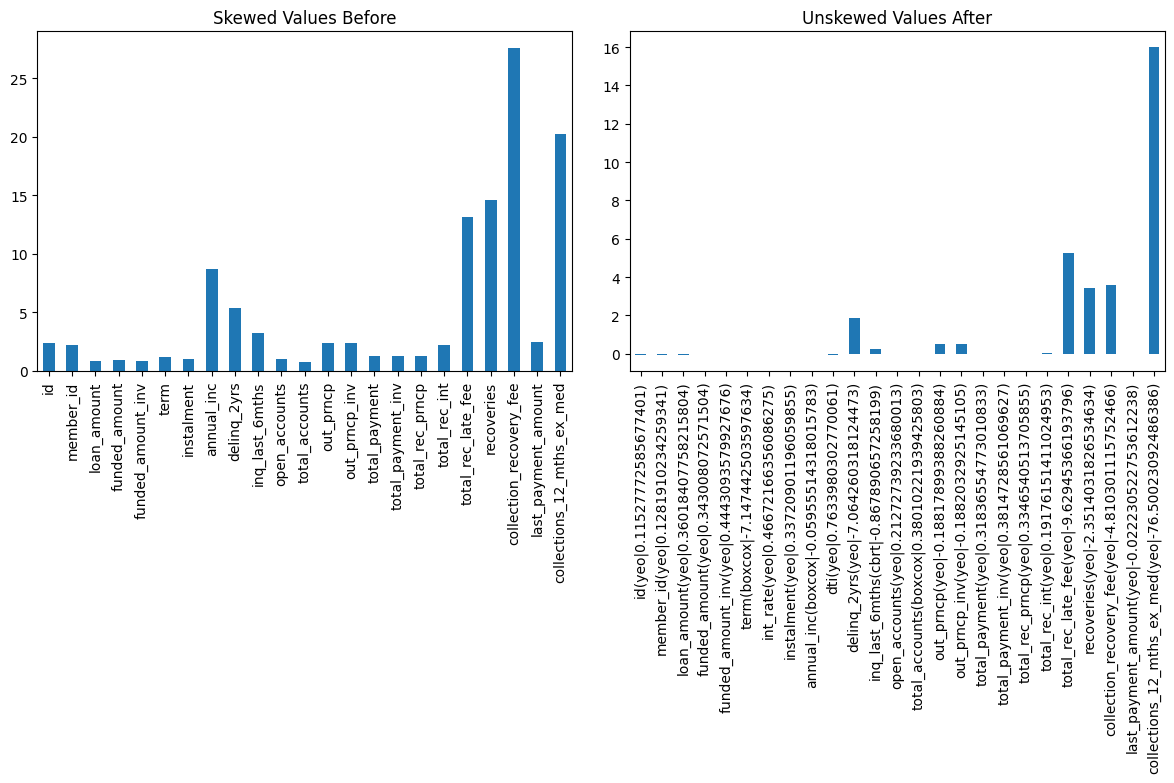

In [5]:
skewed_columns = dtransformer.get_skewed_columns(dataframe, qualitative_list, 0.5)
skewed_dataframe = dtransformer.get_skewed_dataframe(dataframe, skewed_columns)

unskewed_dataframe = dftransformer.remove_skewness(dataframe, qualitative_list)


plotter.plot_skewed_vs_unskewed_graph(skewed_dataframe.skew(), unskewed_dataframe.skew())
#show(dataframe)